In [1]:
#Need this location for rest of the project to be located from
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\credit_card_fraud')

In [2]:
#Load the libraries from package 'credit_card_fraud/__init__.py file under the location mentioned above'
from credit_card_fraud.__init__ import * 
from credit_card_fraud.config import *
from utils import *
from utils.utils_ import *
from utils.utils_local import *

Using TensorFlow backend.


In [3]:
#check the shape of dataframe
train_df = pd.read_csv(train_data_path)
train_df.shape


(30000, 25)

In [4]:
train_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [5]:
#let us rename col names and drop ID
train_df = train_df.rename(columns={'default.payment.next.month':'default'})
train_df = train_df.drop(['ID'], axis =1)

## See the summary of columns

In [6]:
train_df.shape,train_df.dtypes

((30000, 24), LIMIT_BAL    float64
 SEX            int64
 EDUCATION      int64
 MARRIAGE       int64
 AGE            int64
 PAY_0          int64
 PAY_2          int64
 PAY_3          int64
 PAY_4          int64
 PAY_5          int64
 PAY_6          int64
 BILL_AMT1    float64
 BILL_AMT2    float64
 BILL_AMT3    float64
 BILL_AMT4    float64
 BILL_AMT5    float64
 BILL_AMT6    float64
 PAY_AMT1     float64
 PAY_AMT2     float64
 PAY_AMT3     float64
 PAY_AMT4     float64
 PAY_AMT5     float64
 PAY_AMT6     float64
 default        int64
 dtype: object)

## let us get a base model for ourselves

In [7]:
abs(train_df.corr()['default']).sort_values(ascending=False)

default      1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
LIMIT_BAL    0.153520
PAY_AMT1     0.072929
PAY_AMT2     0.058579
PAY_AMT4     0.056827
PAY_AMT3     0.056250
PAY_AMT5     0.055124
PAY_AMT6     0.053183
SEX          0.039961
EDUCATION    0.028006
MARRIAGE     0.024339
BILL_AMT1    0.019644
BILL_AMT2    0.014193
BILL_AMT3    0.014076
AGE          0.013890
BILL_AMT4    0.010156
BILL_AMT5    0.006760
BILL_AMT6    0.005372
Name: default, dtype: float64

#### not much corelated

In [8]:
iv = train_df.drop('default',axis=1)
dv = train_df['default']
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2,random_state=42)#way 1
model = RandomForestClassifier().fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.8075

#### without ant pre-processing and any hyper tuning our model, we get good performance
- let us see, how can we improve our score further

Text(0, 0.5, 'count')

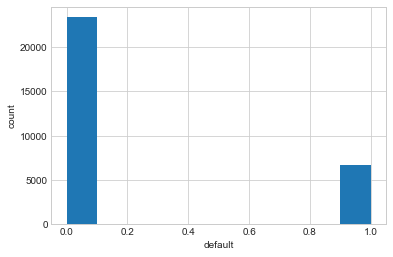

In [9]:
train_df.default.hist()
plt.xlabel('default')
plt.ylabel('count')
# positive cases are less
#0 means negative (defaukt :no)
#1 means positive (default :yes)

In [10]:
fraud,normal = len(train_df[train_df.default == 1]),len(train_df[train_df.default == 0])
print(normal,fraud)

23364 6636


## Insight
Data is unbalanced (approximately 1:1 is balanced data )

## missing value analysis

In [11]:
#no missing value..That's great news
train_df.isnull().sum()


LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

#### no missing value exists

## Univariate analysis

In [12]:
continous_names, cat_names, iv,dv,testparams = iv_dv_get_col_names(train_df,'default')
print('continous :',continous_names, '\ncategorical :',cat_names)

$$ adding LIMIT_BAL(float64) as continous
************************you may need to define this col - SEX in categ variable
******* adding SEX(int64) as continous as per the data type
************************you may need to define this col - EDUCATION in categ variable
******* adding EDUCATION(int64) as continous as per the data type
************************you may need to define this col - MARRIAGE in categ variable
******* adding MARRIAGE(int64) as continous as per the data type
$$ adding AGE(int64) as continous
************************you may need to define this col - PAY_0 in categ variable
******* adding PAY_0(int64) as continous as per the data type
************************you may need to define this col - PAY_2 in categ variable
******* adding PAY_2(int64) as continous as per the data type
************************you may need to define this col - PAY_3 in categ variable
******* adding PAY_3(int64) as continous as per the data type
************************you may need to define thi

In [13]:
#### sex,education,marraige needs conversion to factor

In [14]:
train_df.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

#### let us add a categorical variable for the above suggestions

In [15]:
train_df.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

In [16]:
#round off
train_df.EDUCATION = round(train_df.EDUCATION).astype(int).astype(str)
train_df.MARRIAGE = round(train_df.MARRIAGE).astype(int).astype(str)

#conversion
train_df.SEX = train_df.SEX.astype(str)
#train_df.default = train_df.default.astype(object)

x=continous_names
y = cat_names
continous_names = [i for i in x if i not in ['EDUCATION','MARRIAGE','SEX','default']]
cat_names+=['EDUCATION','MARRIAGE','SEX','default'] 

In [17]:
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

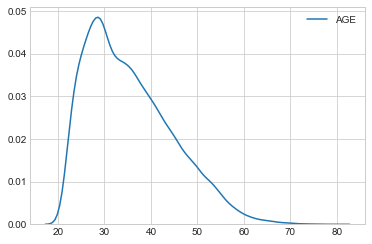

In [18]:
sb.kdeplot(train_df.AGE)

In [19]:
pd.qcut(train_df.AGE[train_df.AGE>45],2).head(2)

4     (50.0, 79.0]
11    (50.0, 79.0]
Name: AGE, dtype: category
Categories (2, interval[float64]): [(45.999, 50.0] < (50.0, 79.0]]

In [20]:
#train_df.age_group = train_df.AGE.astype(str)
#train_df=bk.copy()
for i,data in enumerate([train_df]):
    data.loc[(data.AGE>20)&(data.AGE<26),'age_group'] = 'young_adults'
    data.loc[(data.AGE>=26)&(data.AGE<35),'age_group'] = 'adults'
    data.loc[(data.AGE>=35)&(data.AGE<=45),'age_group'] = 'middle_aged'
    data.loc[(data.AGE>45)&(data.AGE<60),'age_group'] = 'towards_retirement'
    data.loc[(data.AGE>=60),'age_group'] = 'senior'
    data = data.drop('AGE',axis=1)
cat_names.append('age_group')


In [21]:
train_df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,age_group
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,young_adults
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,adults


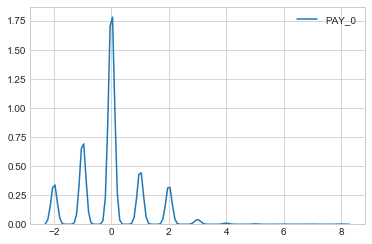

In [22]:
sb.kdeplot(train_df.PAY_0)

#### looks like a standarized variable, let us leave it as it is

In [23]:
print('Negative values in :')
for col in train_df[continous_names].columns:
    print(col, len(train_df[train_df.loc[:,col] <0]))
    #train_df[train_df.PAY_0 >0].describe()

Negative values in :
LIMIT_BAL 0
AGE 0
PAY_0 8445
PAY_2 9832
PAY_3 10023
PAY_4 10035
PAY_5 10085
PAY_6 10635
BILL_AMT1 590
BILL_AMT2 669
BILL_AMT3 655
BILL_AMT4 675
BILL_AMT5 655
BILL_AMT6 688
PAY_AMT1 0
PAY_AMT2 0
PAY_AMT3 0
PAY_AMT4 0
PAY_AMT5 0
PAY_AMT6 0


#### these fields can be standardized values, so leaving them as it is

In [24]:
#lets remove these
#train_df = full_data[0]
#for col in train_df.columns:
#    #train_df.drop(train_df[train_df.loc[:,i] > max].index) #for drop
#    train_df = train_df.drop(train_df[train_df.loc[:,col] <0].index)
#print('Negative values in :')
#for col in train_df.columns:
#    print(col, len(train_df[train_df.loc[:,col] <0]))

In [25]:
train_df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,age_group
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,young_adults
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,adults


---------------original---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  2.6637278271222136
+++++very Right/positive(tail/majority towards right) skewed
Kurtosis :  9.80445504270972
^^^^^^^^Flat
---------------sqrt---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  nan
+++++very Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~~~Pointy
---------------cbrt---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  0.18380497251969125
%%%%%Moderately symm
Kurtosis :  -0.38721950842049635
%%%%%%%%%Moderately Bell shaped


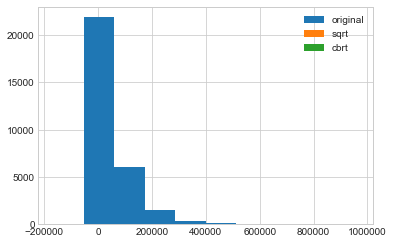

In [26]:
#Just update 'col' and 'var' and run this code to see customised results
var =train_df.BILL_AMT1
col = 'BILL_AMT1'
skew_kurt_dic={}
skew_kurt_dic[col]={}
skew_kurt_dic = skew_kurt_analysis((var),'original',col, skew_kurt_dic,True)
if(not (len(train_df[train_df.loc[:,col]==0]) > 0) ):#If no zero value
    skew_kurt_dic = skew_kurt_analysis(np.log(var),'log',col,skew_kurt_dic,True)
else:
    skew_kurt_dic['log'] =(-1,-1)
skew_kurt_dic = skew_kurt_analysis(np.sqrt(var),'sqrt',col,skew_kurt_dic,True)
skew_kurt_dic = skew_kurt_analysis(np.cbrt(var),'cbrt',col,skew_kurt_dic,True)

plt.legend(loc='upper right')

#### Calculate skew and kurtosis value for each column in train and test data
Also to see, if we got distribution of variables in both train and test. If so, we can expect the model to perform better on actual field data, or if not, then even if we apply these transfomrations on train set, and get good accuracy, we can't be sure about the test data distribution and the results might not be accurate.
It is going to be a trial and error method.
Let us go through all the columns and get the best functions for each column , so that a better distribution can be acheived.

In [27]:
bk=train_df.copy()
x1=continous_names
x2=cat_names

In [28]:
skew_kurt_dic_={}
full_data = [train_df]
data=train_df.copy()
for i,dataset in enumerate(full_data):#for both train and test data
    txt = 'train' if i ==0 else 'test'
    skew_kurt_dic_[txt] = {}
    col_list = dataset[continous_names].columns#only for continous variables
    #print(col_list)
    for col in col_list:
        if col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','AGE']:#skip, dont apply any transformation for these
            continue
        var = dataset.loc[:,col]
        #print(var)
        skew_kurt_dic_[txt][col] = {}
        skew_kurt_dic_[txt] = skew_kurt_analysis((var),'original', col , skew_kurt_dic_[txt],printverbose=False)
        if(not (len([data.loc[:,col] == 0]) > 0) ):#If no zero value
            skew_kurt_dic_[txt] = skew_kurt_analysis(np.log(var),'log', col, skew_kurt_dic_[txt],printverbose=False)
        else:
            skew_kurt_dic_[txt][col]['log'] =(-1,-1)
        skew_kurt_dic_[txt] = skew_kurt_analysis(np.sqrt(var),'sqrt', col, skew_kurt_dic_[txt],printverbose=False)
        skew_kurt_dic_[txt] = skew_kurt_analysis(np.cbrt(var),'cbrt', col, skew_kurt_dic_[txt],printverbose=False)
        
    

In [29]:
#get the best function(log,sqrt,cbrt) to be applied for each col, to get a normal distribution
best_fxn(skew_kurt_dic_['train'])

#print a slice of dic created
{k:skew_kurt_dic_['train'][k] for k in list(skew_kurt_dic_['train'].keys())[:3]}
#print({k:skew_kurt_dic_['test'][k] for k in list(skew_kurt_dic_['test'].keys())[:3]})

{'LIMIT_BAL': {'original': (0.9928173164820109, 0.5359735300865474),
  'log': (-1, -1),
  'sqrt': (0.27664154691282344, -0.7515137939452634),
  'cbrt': (0.026557566794409262, -0.8645018259722641),
  'maxlabel': 'original'},
 'BILL_AMT1': {'original': (2.6637278271222136, 9.80445504270972),
  'log': (-1, -1),
  'sqrt': (nan, nan),
  'cbrt': (0.18380497251969125, -0.38721950842049635),
  'maxlabel': 'cbrt'},
 'BILL_AMT2': {'original': (2.7050855904869455, 10.301028851774069),
  'log': (-1, -1),
  'sqrt': (nan, nan),
  'cbrt': (0.14407601062806866, -0.42280030621041487),
  'maxlabel': 'cbrt'}}

In [30]:
for txt in skew_kurt_dic_.keys():
    print('------------------%s-------'%txt)
    for col in skew_kurt_dic_[txt].keys():
        if skew_kurt_dic_[txt][col]['maxlabel'] != 'original':
            if skew_kurt_dic_[txt][col]['maxlabel'] != 'original':
                print(skew_kurt_dic_[txt][col]['maxlabel'] ,'is best for ',col)

------------------train-------
cbrt is best for  BILL_AMT1
cbrt is best for  BILL_AMT2
cbrt is best for  BILL_AMT3
cbrt is best for  BILL_AMT4
cbrt is best for  BILL_AMT5
cbrt is best for  BILL_AMT6


#### we need to apply the same transformations to testing set later, so that predictions are also on same base as trainings set

In [31]:
### BEfore the transformation

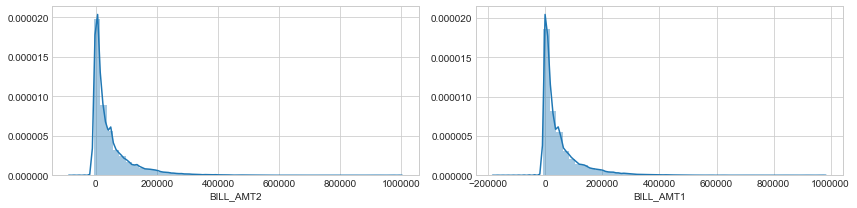

In [32]:
#Let us record old value for comaprisons
df = data[['BILL_AMT2','BILL_AMT1']]
fig,axes = plt.subplots(figsize=(12,3) , ncols = len(df.columns))
for ax,col in zip(axes,df.columns):
    sb.distplot(df[col],ax=ax)
    plt.tight_layout()
plt.savefig('../data/processed/dis_plot_.png',bbox_inches='tight')

In [33]:
### transformation

In [34]:
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
age_group     object
dtype: object

In [35]:
# block of code to apply suggested functions for both train and test
print_count = 0 #Flag to print, just prints first 10 entries from this loop, to have a glimpse
for txt in skew_kurt_dic_.keys():
    #uncomment below line, if diffrernt labels needs to be applied
    #i = 0 if txt == 'train' else 1 #index for full_data
    i = 0 #use train data labels to be applied on both train and test datasets
    for col in skew_kurt_dic_[txt].keys():
        print_count += 1
        if col == 'target':#dependent/target variable
            continue#to next column(skip this)
        if skew_kurt_dic_[txt][col]['maxlabel'] == 'sqrt':
            print('%% sqrt to be applied for ',col)
            full_data[i].loc[:,col] = np.sqrt(full_data[i].loc[:,col])
        elif skew_kurt_dic_[txt][col]['maxlabel'] == 'cbrt':
            print('%% cbrt to be applied for ',col)
            full_data[i].loc[:,col] = np.cbrt(full_data[i].loc[:,col])

        elif skew_kurt_dic_[txt][col]['maxlabel'] == 'log':
            print('%% log to be applied for ',col)
            full_data[i].loc[:,col] = np.log(full_data[i].loc[:,col])
        else:
            print('!! original is the best for ',col)        

!! original is the best for  LIMIT_BAL
%% cbrt to be applied for  BILL_AMT1
%% cbrt to be applied for  BILL_AMT2
%% cbrt to be applied for  BILL_AMT3
%% cbrt to be applied for  BILL_AMT4
%% cbrt to be applied for  BILL_AMT5
%% cbrt to be applied for  BILL_AMT6
!! original is the best for  PAY_AMT1
!! original is the best for  PAY_AMT2
!! original is the best for  PAY_AMT3
!! original is the best for  PAY_AMT4
!! original is the best for  PAY_AMT5
!! original is the best for  PAY_AMT6


In [36]:
### after transformation

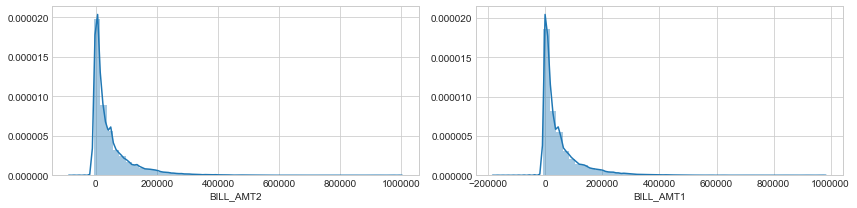

In [37]:
#Let us record old value for comaprisons
df = data[['BILL_AMT2','BILL_AMT1']]
fig,axes = plt.subplots(figsize=(12,3) , ncols = len(df.columns))
for ax,col in zip(axes,df.columns):
    sb.distplot(df[col],ax=ax)
    plt.tight_layout()


#### now we see better distributions

## Outlier analysis

In [38]:
from pprint import pprint
# Just get the oulier info
outlier = {}
skip_list = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','AGE','BILL_AMT1', 'BILL_AMT2', \
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
outlist = [i for i in continous_names if i not in skip_list]
print(outlist)
print('\n------> train')
outlier,train_df= get_outliers(train_df,outlist,outliers_=outlier,drop=False)
pprint(outlier)

['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

------> train
-----values below -235000.0 and above 525000.0 suggested to drop for col LIMIT_BAL:
-----values below -5009.0 and above 11015.0 suggested to drop for col PAY_AMT1:
-----values below -5417.5 and above 11250.5 suggested to drop for col PAY_AMT2:
-----values below -5782.5 and above 10677.5 suggested to drop for col PAY_AMT3:
-----values below -5279.875 and above 9589.125 suggested to drop for col PAY_AMT4:
-----values below -5416.0 and above 9700.0 suggested to drop for col PAY_AMT5:
-----values below -5705.625 and above 9823.375 suggested to drop for col PAY_AMT6:
{'LIMIT_BAL': ['per outliers above max for LIMIT_BAL is 0.5566666666666666',
               'per outliers below min for LIMIT_BAL is 0.0'],
 'PAY_AMT1': ['per outliers above max for PAY_AMT1 is 9.15',
              'per outliers below min for PAY_AMT1 is 0.0'],
 'PAY_AMT2': ['per outliers above max for PAY_AMT2 is 9.046666666666

####  We will treat the other columns
- skip_list  :I am expecting they are standarized columns, and no need to treat them let us leave it as it is

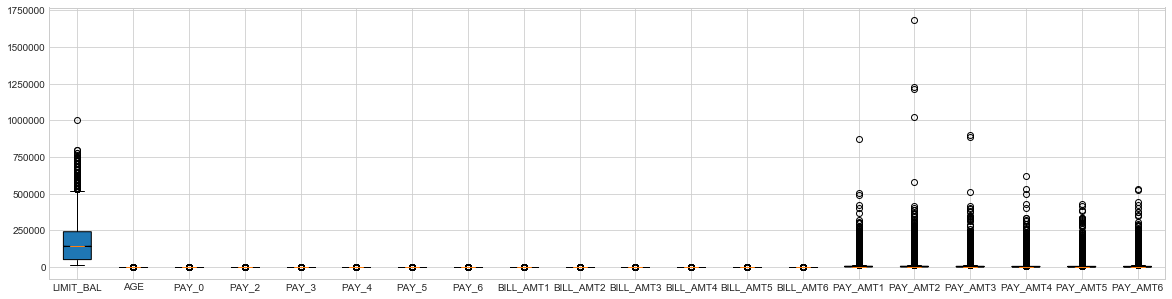

In [39]:
plot = []
f,ax=plt.subplots(figsize=(20,5))
#continous_names = train_df.columns
for i in continous_names:
    #plt.boxplot(train_df.iloc[:,i])
    plot.append(list(train_df.loc[:,i]))
#plot = [list(train_df.loc[:,'Item_Weight']), list(train_df.loc[:,'Item_MRP'])]
plt.boxplot(plot, notch = 'True', patch_artist= True, labels=continous_names)
plt.show()

In [40]:
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
age_group     object
dtype: object

In [41]:
outlier = {}
skip_list = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','AGE','BILL_AMT1', 'BILL_AMT2', \
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
outlist = [i for i in continous_names if i not in skip_list]
print(outlist)
print('\n------> train')
outlier,train_df= get_outliers(train_df,outlist,outliers_=outlier,replace=True)
pprint(outlier)

['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

------> train
-----values below -235000.0 and above 525000.0 suggested to drop for col LIMIT_BAL:
-----values below -5009.0 and above 11015.0 suggested to drop for col PAY_AMT1:
-----values below -5417.5 and above 11250.5 suggested to drop for col PAY_AMT2:
-----values below -5782.5 and above 10677.5 suggested to drop for col PAY_AMT3:
-----values below -5279.875 and above 9589.125 suggested to drop for col PAY_AMT4:
-----values below -5416.0 and above 9700.0 suggested to drop for col PAY_AMT5:
-----values below -5705.625 and above 9823.375 suggested to drop for col PAY_AMT6:
{'LIMIT_BAL': ['per outliers above max for LIMIT_BAL is 0.5566666666666666',
               'per outliers below min for LIMIT_BAL is 0.0'],
 'PAY_AMT1': ['per outliers above max for PAY_AMT1 is 9.15',
              'per outliers below min for PAY_AMT1 is 0.0'],
 'PAY_AMT2': ['per outliers above max for PAY_AMT2 is 9.046666666666

### undersampling vs Oversampling
if standard deviation of the columns is less, then we can take an undersample and it will represent the original data or else SMOTE

(-2.2643030559946427, 2.2309030559946423)

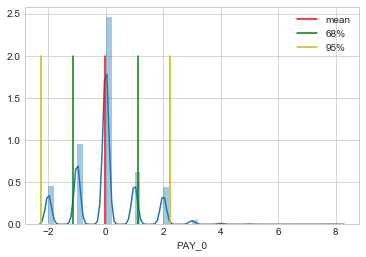

In [42]:
min_95_per , _,_,max_95_per = plot_dist(train_df.PAY_0)
min_95_per,max_95_per
# That looks quite densely distributed

(count     30000.000000
 mean     164977.318730
 std      125179.351588
 min       10000.000000
 25%       50000.000000
 50%      140000.000000
 75%      240000.000000
 max      520000.000000
 Name: LIMIT_BAL, dtype: float64, -85381.38444649355, 415336.0219055164)

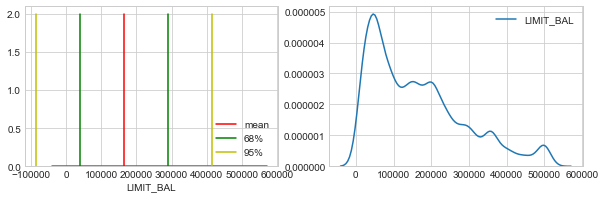

In [43]:
f,ax=plt.subplots(figsize=(10,10))
pltno=321
plt.subplot(pltno)
min_95_per , _,_,max_95_per = plot_dist(train_df.LIMIT_BAL)

pltno=322
plt.subplot(pltno)
sb.kdeplot(train_df.LIMIT_BAL)
train_df.LIMIT_BAL.describe(),min_95_per,max_95_per


#### except for LIMIT_BAL, we see less standard deviation
- Need to go for Oversampling, SD of this col is very high

## Use SMOTE
oversampling to increase the minority class samples i.e. default = 1(fraud)

Prerequisite -  See outliers and fix those, or else outlier values will affect data synthesis and more outlier values will be present in resultant dataset

In [44]:
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
age_group     object
dtype: object

In [45]:
#bk=train_df.copy()
#train_df = bk.copy()
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
age_group     object
dtype: object

In [46]:
#train_df.age_group = train_df.age_group.map({'0':'young_adults','1':'adults','2':'middle_aged','3':'towards_retirement','4':'senior'})
bk = train_df.copy()
len(train_df[train_df['default']==0]),len(train_df[train_df['default']==1])

(23364, 6636)

## correlation analysis

In [47]:
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
age_group     object
dtype: object

AxesSubplot(0.125,0.1925;0.62x0.62)


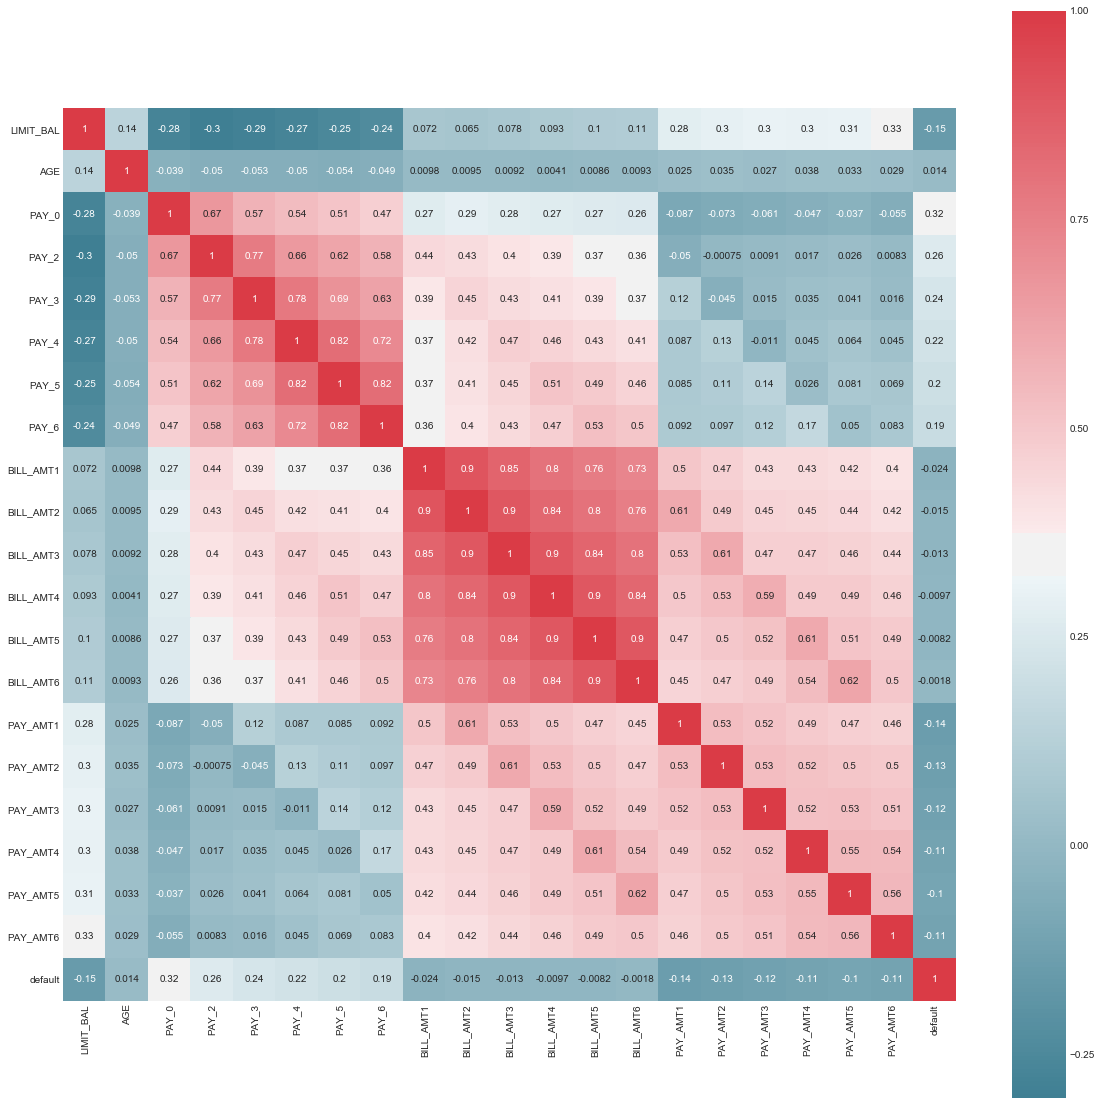

In [48]:
#corr analysis
f,ax=plt.subplots(figsize=(20,20))
corr = train_df.corr()
print(sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),
            square =True,ax=ax,annot = True))

## INSIGHT
PAY* are highly corr with each other, so is BILL_AMT*
while PAY_AMT* are unrelated

## Categorical analysis 
### SEX

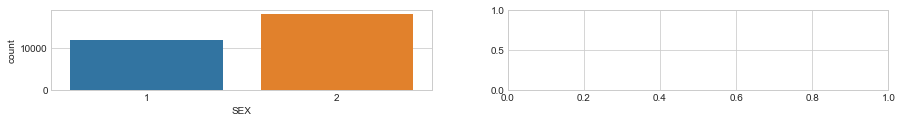

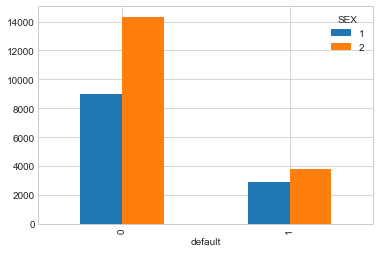

In [49]:
f,ax=plt.subplots(figsize=(15,5))
pltno=321
plt.subplot(pltno)
sb.countplot(train_df.SEX)
#train_df.SEX.value_counts().plot.bar()
#plt.legend()
pltno=322
plt.subplot(pltno)

train_df.groupby('SEX')['default'].value_counts().unstack(0).plot.bar()

### which sex has more defaulters?

In [50]:
df1 = train_df[train_df.default==1]
df0 = train_df[train_df.default==0]
s1 = df1[df1.SEX=='1']
s2= df1[df1.SEX=='2']
print('Non-defaulters : SEX_1 : SEX2',len(df0[df0.SEX=='1'])/len(train_df[train_df.SEX=='1']),\
                                                    len(df0[df0.SEX=='2'])/len(train_df[train_df.SEX=='2']))
print('Defauters :  SEX_1 : SEX2',len(s1)/len(train_df[train_df.SEX=='1']),len(s2)/len(train_df[train_df.SEX=='2']))


Non-defaulters : SEX_1 : SEX2 0.7583277254374159 0.7922371908127208
Defauters :  SEX_1 : SEX2 0.2416722745625841 0.20776280918727916


#### sex=1 has more defaulters ans sex=2 has more non defaulters

### EDUCATION

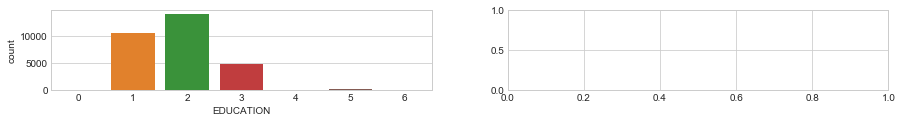

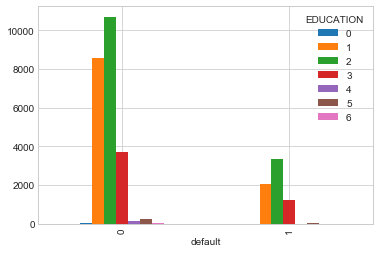

In [51]:
f,ax=plt.subplots(figsize=(15,5))
pltno=321
plt.subplot(pltno)
sb.countplot(train_df.EDUCATION)
pltno=322
plt.subplot(pltno)
train_df.groupby('EDUCATION')['default'].value_counts().unstack(0).plot.bar()

In [52]:
df1 = train_df[train_df.default==1]
df0 = train_df[train_df.default==0]
s1 = df1[df1.EDUCATION=='1'];r1=df0[df0.EDUCATION=='1']
s2= df1[df1.EDUCATION=='2'];r2=df0[df0.EDUCATION=='2']
s3= df1[df1.EDUCATION=='3'];r3=df0[df0.EDUCATION=='3']
#print('Non-defaulters : SEX_1 : SEX2',len(df0[df0.SEX=='1'])/len(train_df[train_df.SEX=='1']),\
#                                                    len(df0[df0.SEX=='2'])/len(train_df[train_df.SEX=='2']))
print('Non Defauters :  EDUCATION_1 : EDUCATION_2:EDUCATION_3',len(r1)/len(train_df[train_df.EDUCATION=='1']),\
      len(r2)/len(train_df[train_df.EDUCATION=='2']),\
      len(r3)/len(train_df[train_df.EDUCATION=='3']))

print('Defauters :  EDUCATION_1 : EDUCATION_2:EDUCATION_3',len(s1)/len(train_df[train_df.EDUCATION=='1']),\
      len(s2)/len(train_df[train_df.EDUCATION=='2']),\
      len(s3)/len(train_df[train_df.EDUCATION=='3']))


Non Defauters :  EDUCATION_1 : EDUCATION_2:EDUCATION_3 0.8076523382144544 0.7626514611546685 0.7484238356721579
Defauters :  EDUCATION_1 : EDUCATION_2:EDUCATION_3 0.19234766178554558 0.23734853884533144 0.2515761643278422


#### education=1 are good customers, education 3 has highest defaulters

### Marriage

In [53]:
train_df.MARRIAGE.unique()

array(['1', '2', '3', '0'], dtype=object)

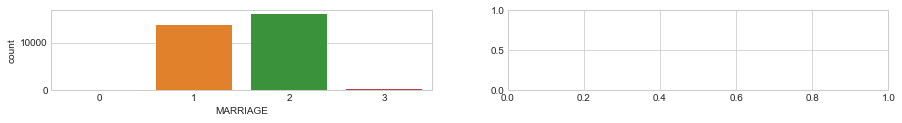

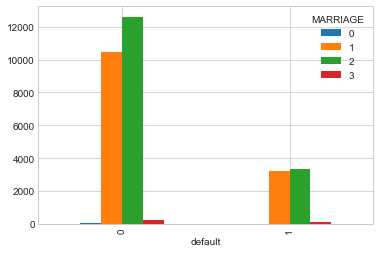

In [54]:
f,ax=plt.subplots(figsize=(15,5))
pltno=321
plt.subplot(pltno)
sb.countplot(train_df.MARRIAGE)
pltno=322
plt.subplot(pltno)
train_df.groupby('MARRIAGE')['default'].value_counts().unstack(0).plot.bar()

In [55]:
df1 = train_df[train_df.default==1]
df0 = train_df[train_df.default==0]
s1 = df1[df1.MARRIAGE=='1'];r1=df0[df0.MARRIAGE=='1']
s2= df1[df1.MARRIAGE=='2'];r2=df0[df0.MARRIAGE=='2']
s3= df1[df1.MARRIAGE=='3'];r3=df0[df0.MARRIAGE=='3']
#print('Non-defaulters : SEX_1 : SEX2',len(df0[df0.SEX=='1'])/len(train_df[train_df.SEX=='1']),\
#                                                    len(df0[df0.SEX=='2'])/len(train_df[train_df.SEX=='2']))
print('Non Defauters :  MARRIAGE_1 : MARRIAGE_2:MARRIAGE_3',len(r1)/len(train_df[train_df.MARRIAGE=='1']),\
      len(r2)/len(train_df[train_df.MARRIAGE=='2']),\
      len(r3)/len(train_df[train_df.MARRIAGE=='3']))

print('Defauters :  MARRIAGE_1 : MARRIAGE_2:MARRIAGE_3',len(s1)/len(train_df[train_df.MARRIAGE=='1']),\
      len(s2)/len(train_df[train_df.MARRIAGE=='2']),\
      len(s3)/len(train_df[train_df.MARRIAGE=='3']))


Non Defauters :  MARRIAGE_1 : MARRIAGE_2:MARRIAGE_3 0.7652829636137345 0.7907166123778502 0.739938080495356
Defauters :  MARRIAGE_1 : MARRIAGE_2:MARRIAGE_3 0.23471703638626545 0.20928338762214985 0.26006191950464397


#### marriage status 3 has highest deafulters

### age_group

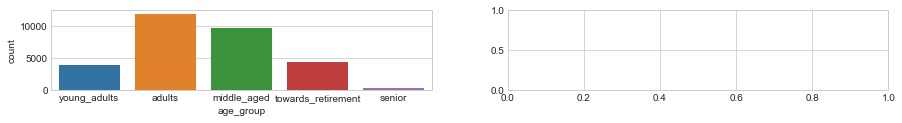

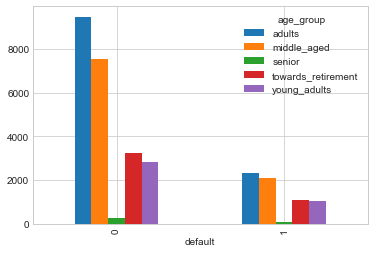

In [56]:
f,ax=plt.subplots(figsize=(15,5))
pltno=321
plt.subplot(pltno)
sb.countplot(train_df.age_group)
pltno=322
plt.subplot(pltno)
train_df.groupby('age_group')['default'].value_counts().unstack(0).plot.bar()

#### people towards retirement(55-60) and young people(20-25) are more defaulters

In [57]:
df1 = train_df[train_df.default==1]
df0 = train_df[train_df.default==0]
s1 = df1[df1.age_group=='adults'];r1=df0[df0.age_group=='adults']
s2= df1[df1.age_group=='young_adults'];r2=df0[df0.age_group=='young_adults']
s3= df1[df1.age_group=='towards_retirement'];r3=df0[df0.age_group=='towards_retirement']
s4= df1[df1.age_group=='middle_aged'];r4=df0[df0.age_group=='middle_aged']


#print('Non-defaulters : SEX_1 : SEX2',len(df0[df0.SEX=='1'])/len(train_df[train_df.SEX=='1']),\
#                                                    len(df0[df0.SEX=='2'])/len(train_df[train_df.SEX=='2']))
print('Non Defauters :  \nyoung_adults : %s \nadults: %s \nmiddle_aged %s\n towards retirement %s'%(\
      len(r2)/len(train_df[train_df.age_group=='young_adults']),\
      len(r1)/len(train_df[train_df.age_group=='adults']),\
      len(r4)/len(train_df[train_df.age_group=='middle_aged']),\
      len(r3)/len(train_df[train_df.age_group=='towards_retirement'])))

print('\nDefauters :  \nyoung_adults : %s \nadults: %s \nmiddle_aged %s\n towards retirement %s'%(\
      len(s2)/len(train_df[train_df.age_group=='young_adults']),\
      len(s1)/len(train_df[train_df.age_group=='adults']),\
      len(s4)/len(train_df[train_df.age_group=='middle_aged']),\
      len(s3)/len(train_df[train_df.age_group=='towards_retirement'])))

Non Defauters :  
young_adults : 0.7334022216481529 
adults: 0.802198731501057 
middle_aged 0.7833938764919564
 towards retirement 0.7501154734411085

Defauters :  
young_adults : 0.26659777835184706 
adults: 0.19780126849894292 
middle_aged 0.2166061235080436
 towards retirement 0.24988452655889146


### chi-square analysis

In [58]:
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
age_group     object
dtype: object

In [59]:
train_df,chi2_skip = chi_sq_analysis(train_df,train_df[['age_group','MARRIAGE','SEX','EDUCATION']].\
                                  columns,'default',drop=False)
#test = chi_sq_analysis1(test,['time','passenger_count'])


Suggest to skip col below---------------------
accept -pvalue 0.000000 age_group
accept -pvalue 0.000000 MARRIAGE
accept -pvalue 0.000000 SEX
accept -pvalue 0.000000 EDUCATION


#### all are significant

### corelation anaylsis

In [60]:
abs(train_df.corr()['default']).sort_values(ascending=False)
#Our corr of DV with IV have decreased as compared to orig dataset, for sake of this oversampling let us take top 10 IV 
#which contribute most to our DV (in next step)

default      1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
LIMIT_BAL    0.153760
PAY_AMT1     0.143268
PAY_AMT2     0.132673
PAY_AMT3     0.122225
PAY_AMT4     0.112835
PAY_AMT6     0.110333
PAY_AMT5     0.100599
BILL_AMT1    0.024099
BILL_AMT2    0.014743
AGE          0.013890
BILL_AMT3    0.013141
BILL_AMT4    0.009653
BILL_AMT5    0.008204
BILL_AMT6    0.001806
Name: default, dtype: float64

In [61]:
#Write processed data to csv
train_df.to_csv(processed_data_path,index=False)
#train_df = pd.read_csv(processed_data_path)
train_df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,age_group
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,young_adults


In [62]:
len(train_df[train_df['default']==0]),len(train_df[train_df['default']==1])

(23364, 6636)

In [63]:
train_df.dtypes

LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
age_group     object
dtype: object

## get_dummies

In [64]:
train_df = pd.get_dummies(train_df,drop_first=True)
train_df.head(1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,age_group_middle_aged,age_group_senior,age_group_towards_retirement,age_group_young_adults
0,20000.0,24,2,2,-1,-1,-2,-2,15.758079,14.584132,...,0,0,0,1,0,0,0,0,0,1


In [65]:
from imblearn.under_sampling import NearMiss

iv = train_df.drop(['default'],axis=1)
dv = train_df['default']
nm = NearMiss(random_state=42)
iv_res,dv_res = nm.fit_sample(iv,dv) #basically draws random sample from the majority class and comes down to count of min class
iv_oversamp = pd.DataFrame(data=iv_res,columns=iv.columns.values)
dv_oversamp = pd.DataFrame(data=dv_res,columns=dv.to_frame().columns.values)
    
train_under = pd.concat([iv_oversamp,dv_oversamp],axis=1)
train_under.shape

(13272, 35)

## SMOTE analysis

In [66]:
smt = SMOTETomek(random_state=42)
#Take backup
#train_df.age_group = train_df.age_group.map({'young_adults':0,'adults':1,'middle_aged':2,'towards_retirement':3,'senior':4})
full_data = [train_df]

#Lets do oversampling for any data set present in full_data
for i,data in enumerate(full_data):
    iv = data.drop(['default'],axis=1)
    dv = data['default']
    txt ='training data' if i==0 else 'training with top10 attributes'
    print('orig ', txt, '(iv)(dv):',iv.shape,dv.shape,'(normal,frauds) :',get_fn_ratio(dv))                   
    iv_res , dv_res = smt.fit_sample(iv,dv)
    print('-----------------------------------------------------')
    print('oversampling ','(iv)(dv): ', txt,iv_res.shape,dv_res.shape,'(normal,frauds) :',get_fn_ratio(dv_res))                   
    iv_oversamp = pd.DataFrame(data=iv_res,columns=iv.columns.values)
    dv_oversamp = pd.DataFrame(data=dv_res,columns=dv.to_frame().columns.values)
    if(i==0):
        train_df = pd.concat([iv_oversamp,dv_oversamp],axis=1)
    else:
        train_top10 = pd.concat([iv_oversamp,dv_oversamp],axis=1)
        
print('Total samples: ',train_df.shape)
"""train_df.SEX = train_df.SEX.astype(str)
train_df.EDUCATION = train_df.EDUCATION.astype(str)
train_df.MARRIAGE = train_df.MARRIAGE.astype(str)
train_df.age_group =train_df.age_group.astype(str)"""
#we see now our target vra i.e default is balanced ..Yeah :)

orig  training data (iv)(dv): (30000, 34) (30000,) (normal,frauds) : (23364, 6636)
-----------------------------------------------------
oversampling  (iv)(dv):  training data (44860, 34) (44860,) (normal,frauds) : (22430, 22430)
Total samples:  (44860, 35)


'train_df.SEX = train_df.SEX.astype(str)\ntrain_df.EDUCATION = train_df.EDUCATION.astype(str)\ntrain_df.MARRIAGE = train_df.MARRIAGE.astype(str)\ntrain_df.age_group =train_df.age_group.astype(str)'

## Model generation
using K folds

--------------------random forest pramaeter tuning------------------
{100: 0.8163333333333334, 200: 0.8155, 500: 0.8156666666666667, 1000: 0.8146666666666667}


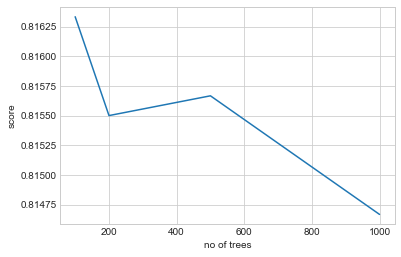

5
{'log2': 0.8163333333333334}
{'log2': 0.8163333333333334, 'auto': 0.8163333333333334}
{'log2': 0.8163333333333334, 'auto': 0.8163333333333334, 5: 0.8163333333333334}


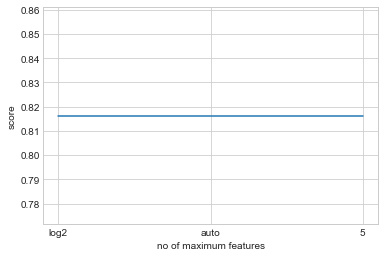

In [67]:
SEED =0
NFOLDS=5
rf_params={}#{'n_estimators':1000,'max_features':5}
svc_params = {
    'kernel' : 'rbf',
    'C' : 0.25,
    'gamma':0.01
    }

lr_params ={
    'C' :0.1
}
rf_params = rf_hyperparameter_tuning(iv,dv,rf_params,classific=True)


In [68]:
rf = sklearnHelper(clf = RandomForestClassifier, seed = SEED,params = rf_params)
svm = sklearnHelper(clf=SVC, seed=SEED, params = svc_params)
nb = sklearnHelper(clf=GaussianNB, seed=SEED, params=None)
lr = sklearnHelper(clf = LogisticRegression, seed = SEED,params = lr_params)


In [69]:
iv = train_df.drop(['default'], axis =1).values
dv = train_df['default'].values


print('RandomForestClasssifier-------')
rf_avg_score,rf_auc_score,rf_rmse_score,logger = get_score(train_df, rf, iv, dv)
print('Average RandomForestClasssifier score', rf_avg_score)

print('SVM-----------------')
svm_avg_score , svm_auc_score,_,_ = -1,[],0,0#get_oof(train_top100, svm, iv, dv)
#SVM almost does while calculating the distances.
#Time comlexity becomes no_samples^2 * no_features for eac feature it needs to calculates svm,so skipping SVm
print('Average SVM score', svm_avg_score)

print('NAIVE BAYES-----------------')
nb_avg_score,nb_auc_score,_,_ = get_score(train_df, nb, iv, dv)
print('Average nb score', nb_avg_score)

print('logisticRegression--------')
lr_avg_score, lr_auc_score,_,_= get_score(train_df, lr, iv, dv)
print('Average lr score', lr_avg_score)

print("Training complete")
result = {'RandomForestClasssifier':(rf_avg_score,rf_auc_score),
         'svm':(svm_avg_score,svm_auc_score),
         'naive bayes': (nb_avg_score,nb_auc_score),
         'LogisticRegression':(lr_avg_score,lr_auc_score)}
#upd_result = dict((val[0],key) for key,val in result.items())#create a dic by rev 'result' pairs and extracting key with max value
#print('%%%%%%%%%% BEST model :',upd_result[get_max(result)] ,'-----score',get_max(result))
      


RandomForestClasssifier-------
model score : 0.8166518056174766
auc : 0.7912371115510837
model score : 0.816540347748551
auc : 0.8033990587094929
model score : 0.8450735621934908
auc : 0.81200495030251
model score : 0.9617699509585377
auc : 0.9887683219120667
model score : 0.9887427552385198
fpr is nan
Average RandomForestClasssifier score 0.8857556843513151
SVM-----------------
Average SVM score -1
NAIVE BAYES-----------------
model score : 0.49621043245653146
auc : 0.6290772844427387
model score : 0.4977708426214891
auc : 0.656514175195926
model score : 0.5295363352652698
auc : 0.6633670613529479
model score : 0.6781096745430227
auc : 0.6731683035809074
model score : 0.6854658938921088
fpr is nan
Average nb score 0.5774186357556843
logisticRegression--------
model score : 0.5884975479268837
auc : 0.7176996984220735
model score : 0.5941818992420865
auc : 0.7370074036358412
model score : 0.6358671422202408
auc : 0.7505708716235033
model score : 0.5420196165849309
auc : 0.70195754299824

## Analysis
classification metrics is not a good indication for imbalanced datasets
Rather we use ROC 
## Findings of roc_curve
Recall is also called sensitivity(TP rate)
Specificity is also called TN rate
F1 score = combination of recall and specificity
Depending on the kind of problem you want to solve you may want to maximize either sensitivity or specificity.
confusion matrix considers only a single threshild value to generate a curve vs all possibe classification thresholds are considered for ROC curve

ROC compares TPR(y-axis) vs FPR(x-axis) 
More the area under the curve, better the model 
E.g. Paper published in a Journal
positives(admitted) = 250
negatives(not admitted) =250

Based on prob threshold(>0.6 genrally) which we set, we classify into classes
If you model did not do well, then distribution plot for both classes will be overalapping for a significant area and 
the roc curve will be a 45 degree line, telling that model just did guessing

TPR = TP / all positives
FPR = FP/ all negatives

Curve generation
E.g. If threshold is say 0.8,then the area to the right of the curve is admitted and to the left is not admitted
TPR = 50(red pixels to the right of threshold line)/250(total red(pos) pixels)
FPR = 0(blue pixels to the right of threshold line)/250(total red(pos) pixels)
plot (FPR,TPR) --> (0,0.2)
E.g. If threshold is say 0.5, then the area to the right of the curve is admitted and to the left is not admitted
TPR = 230(red pixels to the right of threshold line)/250(total red(pos) pixels)=0.94
FPR = 125(blue pixels to the right of threshold line)/250(total red(pos) pixels)=0.5
plot (FPR,TPR) --> (0.5,0.94)
All the possible classificaton thresholds are considered and points are plotted to fit a curve

So for good model, curve will be hugging the topmost left corner, more area under the curve
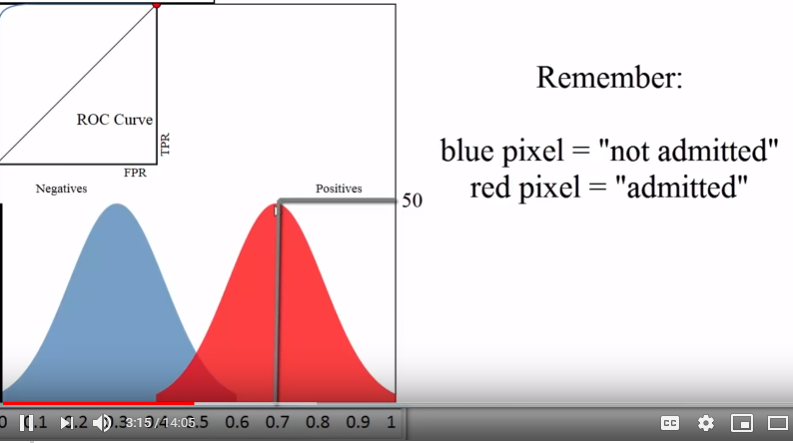


In [70]:
train_df = normalize(train_df,train_df[continous_names])

In [71]:
train_df.head(1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,age_group_middle_aged,age_group_senior,age_group_towards_retirement,age_group_young_adults,default
0,0.019608,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.459749,0.394525,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [72]:
vif = pd.DataFrame()
predictors = train_df.drop(['default','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','PAY_2','PAY_5','PAY_4',
                            'BILL_AMT5','BILL_AMT6','MARRIAGE_3','EDUCATION_3'],axis=1)
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,3.766044,LIMIT_BAL
1,7.622854,PAY_0
2,8.472559,PAY_3
3,6.615361,PAY_6
4,3.928682,PAY_AMT1
5,3.922670,PAY_AMT2
6,3.693493,PAY_AMT3
7,3.829223,PAY_AMT4
8,3.739371,PAY_AMT5
9,3.561749,PAY_AMT6


0.6817877842175658
col_0     0     1
row_0            
0      3036  1467
1      1388  3081
col_0     0     1
row_0            
0      3036  1467
1      1388  3081
accuracies: 
Accuracy in Identifying non-defaulters : 67.74406332453826
Wrongly telling a person will default 32.25593667546175
**Accuracy in Identifying defaulters 68.625678119349
**Wrongly telling a person will not default, whereas he is going to be 31.374321880650996
0.7564388465917677


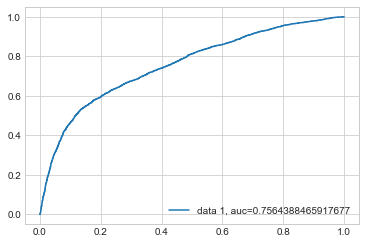

In [73]:
iv = train_df.drop(['default','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','PAY_2','PAY_5','PAY_4',
                            'BILL_AMT5','BILL_AMT6','MARRIAGE_1','EDUCATION_3'],axis=1)
dv = train_df['default'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2)

model = LogisticRegression(C=0.1)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print(model.score(iv_test,dv_test))#accuracy
cm_analysis(iv_test, dv_test,dv_test_pred)
plot_roc(model,iv_test,dv_test)


0.6562639322336157
col_0     0     1
row_0            
0      2263  2233
1       851  3625
col_0     0     1
row_0            
0      2263  2233
1       851  3625
accuracies: 
Accuracy in Identifying non-defaulters : 61.88118811881188
Wrongly telling a person will default 38.11881188118812
**Accuracy in Identifying defaulters 72.67180475272961
**Wrongly telling a person will not default, whereas he is going to be 27.328195247270394
0.7467624632679153


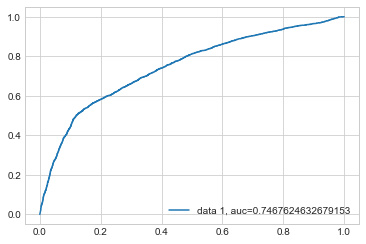

In [74]:
iv = train_df.drop(['default'],axis=1)
dv = train_df['default'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2)

model = GaussianNB()
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print(model.score(iv_test,dv_test))#accuracy
cm_analysis(iv_test, dv_test,dv_test_pred)
plot_roc(model,iv_test,dv_test)


In [75]:
train_df.head(1)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,age_group_middle_aged,age_group_senior,age_group_towards_retirement,age_group_young_adults,default
0,0.019608,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.459749,0.394525,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


0.8713776192599197 0.8592287115470352
col_0     0     1
row_0            
0      4098   407
1       856  3611
col_0     0     1
row_0            
0      4098   407
1       856  3611
accuracies: 
Accuracy in Identifying non-defaulters : 89.87058237929318
Wrongly telling a person will default 10.12941762070682
**Accuracy in Identifying defaulters 82.72103350827614
**Wrongly telling a person will not default, whereas he is going to be 17.27896649172386
0.9221990241919594


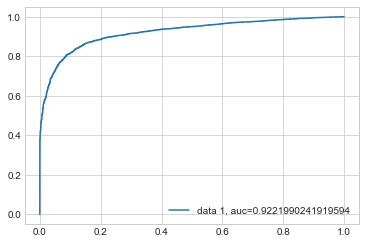

In [76]:
iv = train_df.drop(['default'],axis=1)
dv = train_df['default'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2,random_state=42)

model = RandomForestClassifier(n_estimators=1000,max_features=5,max_depth=8)#,min_samples_leaf=50)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print(model.score(iv_train,dv_train),model.score(iv_test,dv_test))#accuracy
cm_analysis(iv_test, dv_test,dv_test_pred)
plot_roc(model,iv_test,dv_test)


### Randomforest fits better since auc value is greater, along with score value

In [77]:
train_df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'age_group_middle_aged', 'age_group_senior',
       'age_group_towards_retirement', 'age_group_young_adults', 'default'],
      dtype='object')

0.8729101649576461 0.8631297369594293
col_0     0     1
row_0            
0      4243   262
1       966  3501
col_0     0     1
row_0            
0      4243   262
1       966  3501
accuracies: 
Accuracy in Identifying non-defaulters : 93.0374701036407
Wrongly telling a person will default 6.962529896359287
**Accuracy in Identifying defaulters 81.45517373776157
**Wrongly telling a person will not default, whereas he is going to be 18.544826262238434
0.9183614604273986


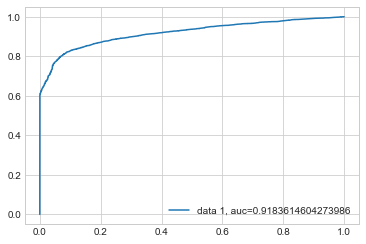

In [78]:
iv = train_df[['EDUCATION_1','EDUCATION_3','SEX_2','age_group_middle_aged', 'age_group_senior',
       'age_group_towards_retirement', 'age_group_young_adults','PAY_0','LIMIT_BAL']]
dv = train_df['default'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2,random_state=42)

model = RandomForestClassifier(n_estimators=1000,max_features=5,max_depth=8)#,min_samples_leaf=50)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print(model.score(iv_train,dv_train),model.score(iv_test,dv_test))#accuracy
cm_analysis(iv_test, dv_test,dv_test_pred)
plot_roc(model,iv_test,dv_test)


### These features are the most important ones

Text(0, 0.5, 'output')

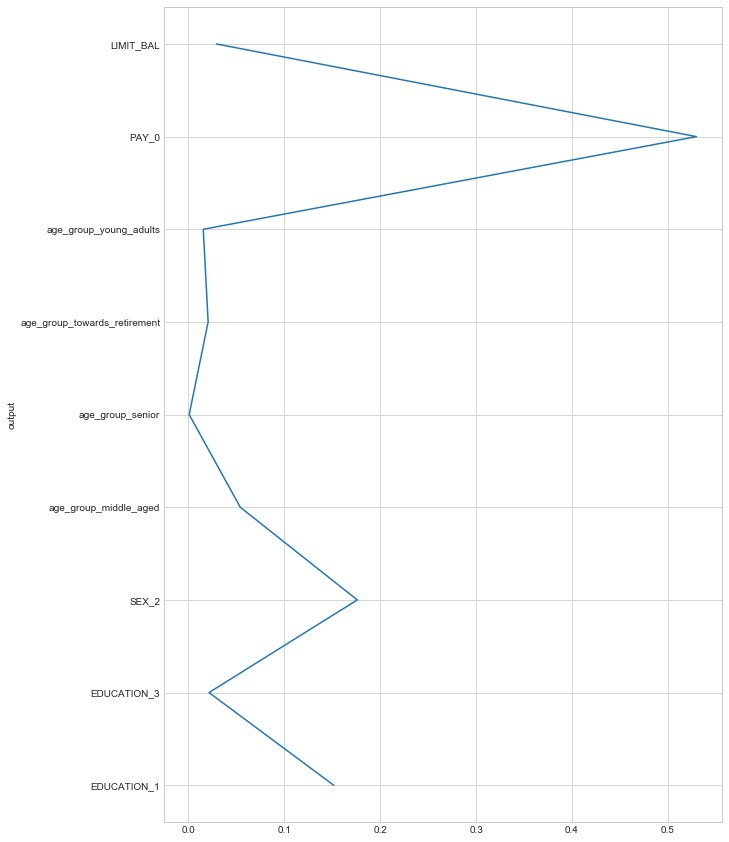

In [79]:
f,ax=plt.subplots(figsize=(10,15))
cols = iv.columns
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': model.feature_importances_})
plt.plot(list(feature_dataframe['Random Forest feature importances']),list(feature_dataframe.features))
plt.ylabel('output')